# Declaration of Originality

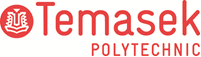

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Kaza Hamsitha Chowdary
* Tutorial Group                :  P02
* Tutor						    :  Ms Esther Goh
* Submission Date               : 11 Feb 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [3]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly

# 1. Business Understanding
Goal:
As a real estate analytics company operating in Punggol, Woodlands and Tampines, our goal is to build a data-driven pricing model that can accurately estimate HDB resale flat prices before a unit is listed on the market. By leveraging historical transaction data and key flat characteristics such as town, flat type, floor area, storey range, and lease information, we aim to support our internal valuation process and provide consistent, objective price recommendations.

This model allows us to benchmark asking prices against market trends, reduce reliance on manual appraisal, and identify pricing patterns across different towns and flat configurations. Ultimately, the system helps our agents and analysts make faster, more informed pricing decisions and improves confidence when advising sellers on competitive listing prices.

# 2. Data Understanding

## 2.1 Load dataset

In [4]:
#https://data.gov.sg/datasets?agencies=Housing+%26+Development+Board+(HDB)&resultId=189
#https://data.gov.sg/collections/189/view

## Read *.csv file into pandas DataFrame
FILE_PATH = "Resale flat prices based on registration date from Jan-2017 onwards.csv"
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
223195,2026-01,YISHUN,5 ROOM,238,YISHUN RING RD,04 TO 06,125.0,Improved,1985,58 years 07 months,590000.0
223196,2026-01,YISHUN,5 ROOM,213,YISHUN ST 21,10 TO 12,121.0,Improved,1985,58 years 01 month,678000.0
223197,2026-01,YISHUN,5 ROOM,626,YISHUN ST 61,07 TO 09,121.0,Improved,1987,60 years 05 months,745888.0
223198,2026-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,61 years 11 months,888000.0


## 2.2 Summary Statistics

In [5]:
#check which towns are present
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

Since we are focusing on only Punggol, Woodlands and Tampines I will drop the rest of the columns.

In [6]:
keep_towns = ['WOODLANDS', 'PUNGGOL', 'TAMPINES']

df = df[df['town'].isin(keep_towns)]

# Drop remaining_lease column
df = df.drop(columns=['remaining_lease'])

df['town'].unique()

df


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
708,2017-01,PUNGGOL,4 ROOM,203B,PUNGGOL FIELD,10 TO 12,85.0,Model A,2004,350000.0
709,2017-01,PUNGGOL,4 ROOM,132,EDGEDALE PLAINS,07 TO 09,91.0,Premium Apartment,2003,370000.0
710,2017-01,PUNGGOL,4 ROOM,128A,PUNGGOL FIELD WALK,07 TO 09,91.0,Model A,2003,370000.0
711,2017-01,PUNGGOL,4 ROOM,106B,PUNGGOL FIELD,13 TO 15,90.0,Model A,2003,380000.0
712,2017-01,PUNGGOL,4 ROOM,614A,EDGEFIELD PLAINS,01 TO 03,92.0,Model A,2012,408000.0
...,...,...,...,...,...,...,...,...,...,...
223131,2026-01,WOODLANDS,5 ROOM,862,WOODLANDS ST 83,01 TO 03,127.0,Improved,1996,655000.0
223132,2026-01,WOODLANDS,EXECUTIVE,670,WOODLANDS DR 71,01 TO 03,130.0,Apartment,2000,820000.0
223133,2026-01,WOODLANDS,EXECUTIVE,652,WOODLANDS RING RD,04 TO 06,144.0,Maisonette,1998,885000.0
223134,2026-01,WOODLANDS,EXECUTIVE,658,WOODLANDS RING RD,01 TO 03,143.0,Apartment,1998,820000.0


In [7]:
## Understand the type of variable for each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 47314 entries, 708 to 223135
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                47314 non-null  object 
 1   town                 47314 non-null  object 
 2   flat_type            47314 non-null  object 
 3   block                47314 non-null  object 
 4   street_name          47314 non-null  object 
 5   storey_range         47314 non-null  object 
 6   floor_area_sqm       47314 non-null  float64
 7   flat_model           47314 non-null  object 
 8   lease_commence_date  47314 non-null  int64  
 9   resale_price         47314 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


In [8]:
## Check for missing data
df.isna().sum() ## Alternative: df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [9]:
## Describe data distribution
df.describe(include="all")          

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
count,47314,47314,47314,47314,47314,47314,47314.000000,47314,47314.000000,4.731400e+04
unique,109,3,6,1513,92,11,NaN,16,NaN,NaN
top,2024-07,PUNGGOL,4 ROOM,308A,PUNGGOL DR,04 TO 06,NaN,Model A,NaN,NaN
freq,671,16235,22068,173,2361,11412,NaN,19043,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,101.578856,NaN,2001.760557,5.269055e+05
std,NaN,NaN,NaN,NaN,NaN,NaN,22.690550,NaN,12.234945,1.507969e+05
min,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,1974.000000,1.500000e+05
25%,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,NaN,1993.000000,4.180000e+05
50%,NaN,NaN,NaN,NaN,NaN,NaN,101.000000,NaN,2000.000000,5.100000e+05
75%,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,2014.000000,6.200000e+05


In [10]:
## Check for duplicated data
df.duplicated().sum()

np.int64(90)

In [11]:
# Show all rows that are duplicated
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
724,2017-01,PUNGGOL,4 ROOM,614B,EDGEFIELD PLAINS,16 TO 18,97.0,Model A,2012,468000.0
725,2017-01,PUNGGOL,4 ROOM,601C,PUNGGOL CTRL,13 TO 15,94.0,Model A,2012,470000.0
736,2017-01,PUNGGOL,4 ROOM,614B,EDGEFIELD PLAINS,16 TO 18,97.0,Model A,2012,468000.0
737,2017-01,PUNGGOL,4 ROOM,601C,PUNGGOL CTRL,13 TO 15,94.0,Model A,2012,470000.0
751,2017-01,PUNGGOL,5 ROOM,171C,EDGEDALE PLAINS,16 TO 18,110.0,Improved,2004,468000.0
...,...,...,...,...,...,...,...,...,...,...
210540,2025-04,PUNGGOL,4 ROOM,618A,PUNGGOL DR,10 TO 12,93.0,Premium Apartment,2013,720000.0
215704,2025-09,TAMPINES,3 ROOM,601B,TAMPINES AVE 9,07 TO 09,68.0,Model A,2020,630000.0
215705,2025-09,TAMPINES,3 ROOM,601B,TAMPINES AVE 9,07 TO 09,68.0,Model A,2020,630000.0
219222,2025-09,WOODLANDS,4 ROOM,706,WOODLANDS DR 40,01 TO 03,100.0,Model A,1996,535000.0


Although we see duplicates of the data, we will not be handling them as these duplicates could possibly be real data since, multiple flats from the same Blk, same storey range will have the same information here, hence looking like duplicated data, when in reality they are real data. 

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

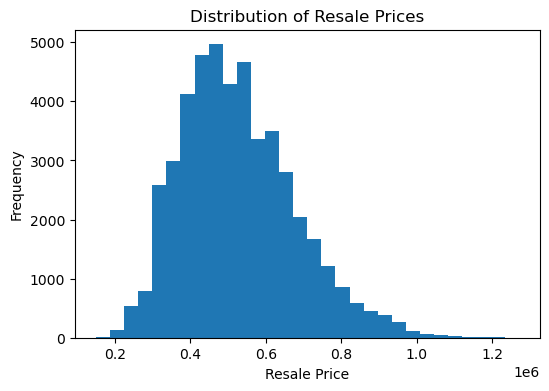

In [12]:
## Understanding distribution of target
plt.figure(figsize=(6,4))
plt.hist(df['resale_price'], bins=30)
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Resale Prices')
plt.show()

The distribution of resale prices is right-skewed, with most transactions concentrated between approximately $350,000 and $650,000. The frequency declines gradually as prices increase, with a long right tail extending beyond $1 million, indicating the presence of a small number of high-value outliers. Very low resale prices are relatively rare.

The right-skewed distribution indicates that extreme high-value resale prices may disproportionately influence regression models, particularly those that minimise squared error. This can lead to larger prediction errors for typical mid-priced flats if outliers are not handled appropriately. To mitigate this, techniques such as log-transforming the target variable or using robust models can be considered to reduce the influence of extreme values and improve overall predictive performance.

### 2.3.1.2 Understanding distribution of features

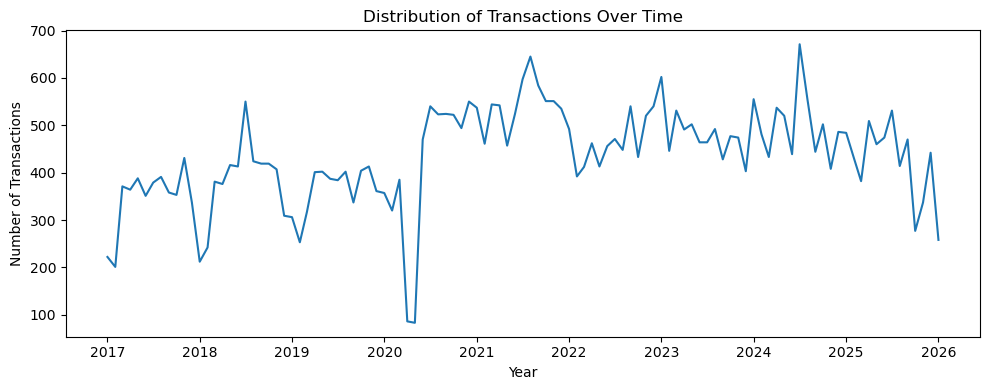

In [13]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt

# make a temporary datetime series
month_dt = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')

# count transactions per month
monthly_counts = month_dt.value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(monthly_counts.index, monthly_counts.values)

plt.title("Distribution of Transactions Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Transactions")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


The number of HDB resale transactions fluctuates from month to month across the entire time period rather than remaining stable. Between 2017 and 2019, monthly transaction counts generally fall in the range of around 300 to 450 transactions, with occasional short-term peaks and dips. A clear and extreme outlier is observed around mid-2020, where transaction volumes drop sharply to below 100 transactions, representing the lowest point in the dataset. Following this period, transaction activity rebounds strongly, with most months from 2021 onwards recording approximately 450 to 650 transactions, indicating both a higher overall level and increased variability. Toward the later part of the timeline, some decline is visible, but monthly volumes remain above the earlier minimum levels.

From a modelling perspective, this chart shows that transaction activity is not evenly distributed over time and contains a significant temporal outlier. Periods with higher transaction volumes contribute more data points and may therefore have a stronger influence on model training. The sharp drop in 2020 represents an unusual market condition that could affect model performance if not considered properly. This temporal pattern suggests that time-related features, such as transaction year and month, may contain useful information for predicting resale prices. If these temporal effects are ignored, the model may struggle to generalise across different market conditions, especially during periods of unusually low or high transaction activity.

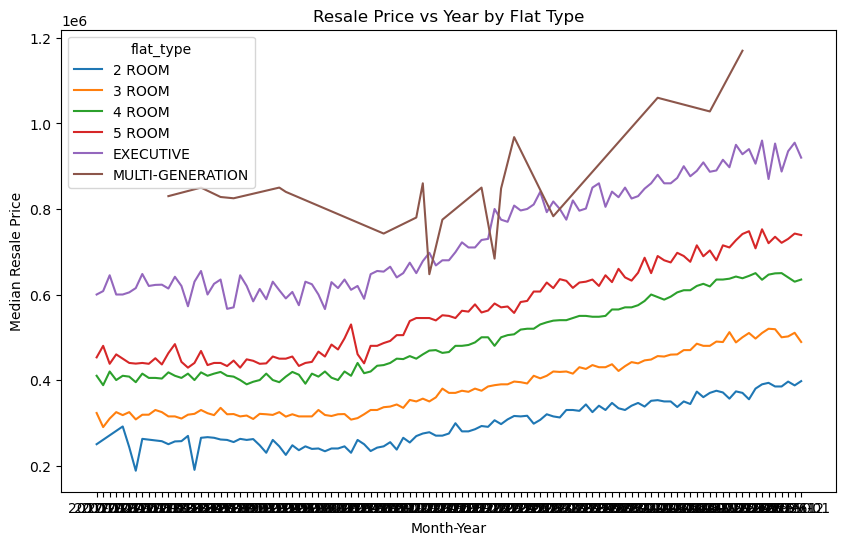

In [14]:
price_trend = (
    df.groupby(['month', 'flat_type'])['resale_price']
      .median()
      .reset_index()
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=price_trend,
    x='month',
    y='resale_price',
    hue='flat_type'
)
plt.title('Resale Price vs Year by Flat Type')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price')
plt.show()


Median resale prices for all flat types show a clear upward trend over time, indicating that resale prices have generally increased across the years. Throughout the entire period, there is a consistent price hierarchy between flat types: Multi-Generation and Executive flats have the highest median resale prices, followed by 5-room, 4-room, 3-room, and 2-room flats, which remain the lowest. Although all flat types experience price growth, higher-end flat types exhibit larger price levels and greater fluctuations, while smaller flat types show steadier and more gradual increases. Short-term fluctuations are visible across all lines, reflecting month-to-month variation, but the overall upward trend remains consistent.

From a modelling perspective, this pattern indicates that flat type is a strong and meaningful predictor of resale price, as different flat types consistently occupy distinct price ranges. The parallel upward movement across flat types suggests that time-related factors affect all flat types, while flat type itself captures structural differences in pricing. This supports retaining both flat type and time-based features in the model. The greater variability observed in higher-end flat types also suggests that predictions for these categories may be less stable and require sufficient data to capture their price behaviour accurately.

In [15]:
high_cardinality_cols = ['street_name', 'block']

for col in high_cardinality_cols:
    print(f"\n--- {col.upper()} ---")
    print("Number of unique values:", df[col].nunique())
    print(df[col].value_counts())



--- STREET_NAME ---
Number of unique values: 92
street_name
PUNGGOL DR          2361
PUNGGOL FIELD       2098
EDGEFIELD PLAINS    1717
PUNGGOL CTRL        1687
EDGEDALE PLAINS     1643
                    ... 
WOODLANDS ST 11       72
WOODLANDS AVE 3       66
MARSILING CRES        49
TAMPINES CTRL 1       46
WOODLANDS AVE 9       44
Name: count, Length: 92, dtype: int64

--- BLOCK ---
Number of unique values: 1513
block
308A    173
308C    155
310B    139
308B    117
310A    111
       ... 
482       1
860A      1
860B      1
409C      1
875B      1
Name: count, Length: 1513, dtype: int64


The street_name feature contains 92 unique values, with transaction counts that vary widely across categories. A small number of street names, such as PUNGGOL DR (2361 transactions) and PUNGGOL FIELD (2098 transactions), appear very frequently, while many other street names have fewer than 100 transactions, with some appearing fewer than 50 times. This indicates a highly imbalanced categorical distribution, where a few categories dominate the data and many others are sparsely represented.

The block feature exhibits extremely high cardinality, with 1,513 unique values. Although a small number of blocks, such as 308A (173 transactions) and 308C (155 transactions), appear relatively frequently, the majority of blocks occur only once or a few times. This results in a long-tailed distribution with many rare categories that provide very limited information for model learning.

From a modelling perspective, retaining street_name and block would require one-hot encoding a very large number of categories, significantly increasing the feature space and model complexity. Given that many categories have very few observations, this would increase the risk of overfitting and reduce the model’s ability to generalise. Furthermore, much of the location-related information in these features is already captured at a higher level by the town variable. Therefore, I will be dropping street_name and block during data preparation to reduce dimensionality, improve model efficiency, and minimise overfitting without losing substantial predictive information.

Resale prices show an increasing trend over time across all flat types, while the relative price differences between flat types remain consistent.

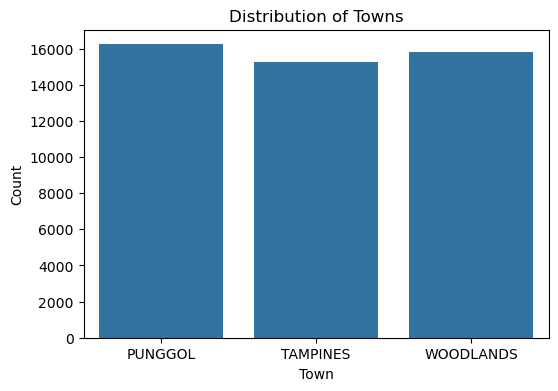

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='town')
plt.title("Distribution of Towns")
plt.xlabel("Town")
plt.ylabel("Count")
plt.show()

The distribution of transactions across the three selected towns—Punggol, Tampines, and Woodlands—is relatively balanced, with each town contributing a similar number of records. Punggol and Woodlands have slightly higher transaction counts compared to Tampines, but the differences are not large, and no town dominates the dataset. This indicates that the dataset is not heavily skewed toward any single town.
From a modelling perspective, this balanced distribution reduces the risk of location bias, where the model might otherwise be overly influenced by one dominant town. Since all three towns are well represented, the model can learn town-specific price patterns more reliably.

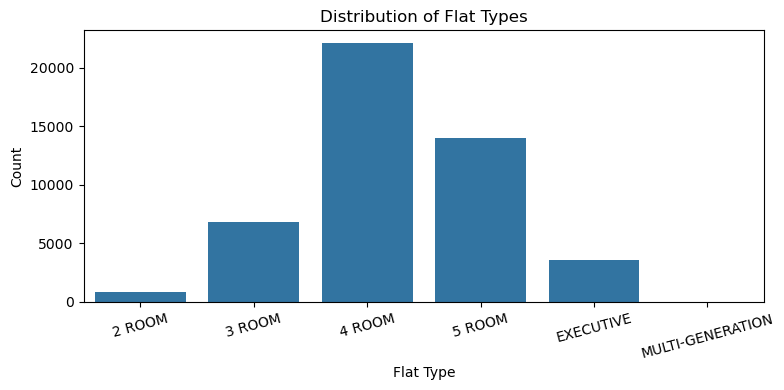

In [17]:
flat_type_order = [
    '2 ROOM',
    '3 ROOM',
    '4 ROOM',
    '5 ROOM',
    'EXECUTIVE',
    'MULTI-GENERATION'
]

plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='flat_type',
    order=flat_type_order
)

plt.title("Distribution of Flat Types")
plt.xlabel("Flat Type")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The distribution of flat types is very imbalanced. 4-room flats make up the largest proportion of transactions, followed by 5-room and 3-room flats. In contrast, Executive, 2-room, and especially Multi-Generation flats appear far less frequently, with Multi-Generation flats having very few transactions relative to other categories. This shows that resale activity is concentrated mainly around mid-sized flat types, while smaller and specialised flat types are underrepresented.

From a modelling perspective, this imbalance means that the model will be more strongly influenced by common flat types, particularly 4-room and 5-room flats, because they contribute most of the training data. Predictions for rare flat types such as Multi-Generation and 2-room flats may be less accurate or less stable due to limited data. 

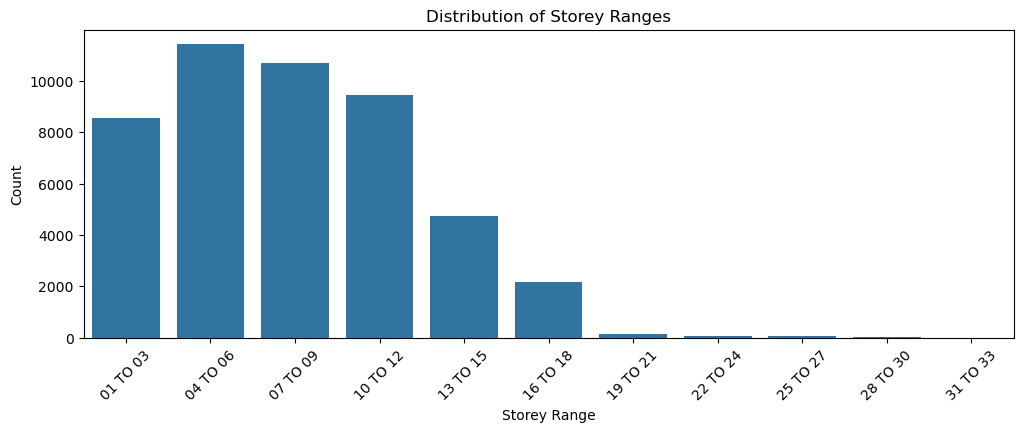

In [18]:
storey_order = sorted(
    df['storey_range'].unique(),
    key=lambda x: int(x.split(' ')[0])
)

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='storey_range', order=storey_order)
plt.title("Distribution of Storey Ranges")
plt.xlabel("Storey Range")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


The distribution of storey ranges is skewed toward lower and mid-level floors. The highest number of transactions occurs in storey ranges 04 TO 06, 07 TO 09, and 10 TO 12, followed closely by 01 TO 03. As the storey range increases beyond 13 TO 15, transaction counts drop sharply, with very few transactions occurring above 19 TO 21 and almost none in the highest storey ranges. This indicates that most resale activity takes place in lower- to mid-rise units, while high-floor units are relatively rare.

From a modelling perspective, this imbalance means that the model will learn more strongly from lower and mid-level storeys, as they dominate the dataset. Higher storey ranges may have less stable or less reliable predictions due to the limited number of observations.

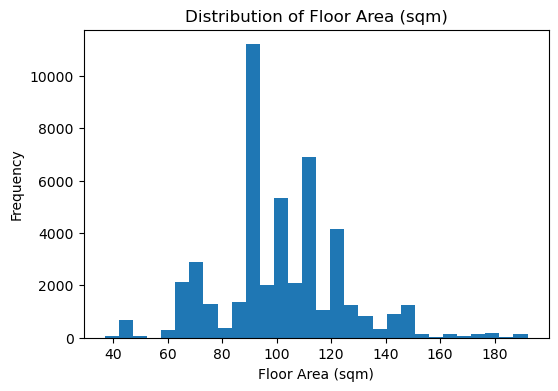

In [19]:
plt.figure(figsize=(6,4))
plt.hist(df['floor_area_sqm'], bins=30)
plt.title("Distribution of Floor Area (sqm)")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Frequency")
plt.show()


The distribution of floor area is right-skewed, with the majority of resale flats concentrated within a mid-range of sizes. Most transactions occur approximately between 80 sqm and 120 sqm, where the highest frequencies are observed. Smaller flats below 60 sqm appear much less frequently, while larger flats above 140 sqm form a long right tail. A small number of very large flats, extending to around 180–190 sqm, can be observed as outliers.

From a modelling perspective, this indicates that floor area is a strong and important numeric feature, as it is well represented across most of the dataset. However, the presence of extreme values means that models sensitive to outliers may be influenced disproportionately by very large flats. Since most observations lie within the mid-range, the model will learn price patterns most effectively for typical flat sizes, while predictions for unusually small or large flats may be less reliable.

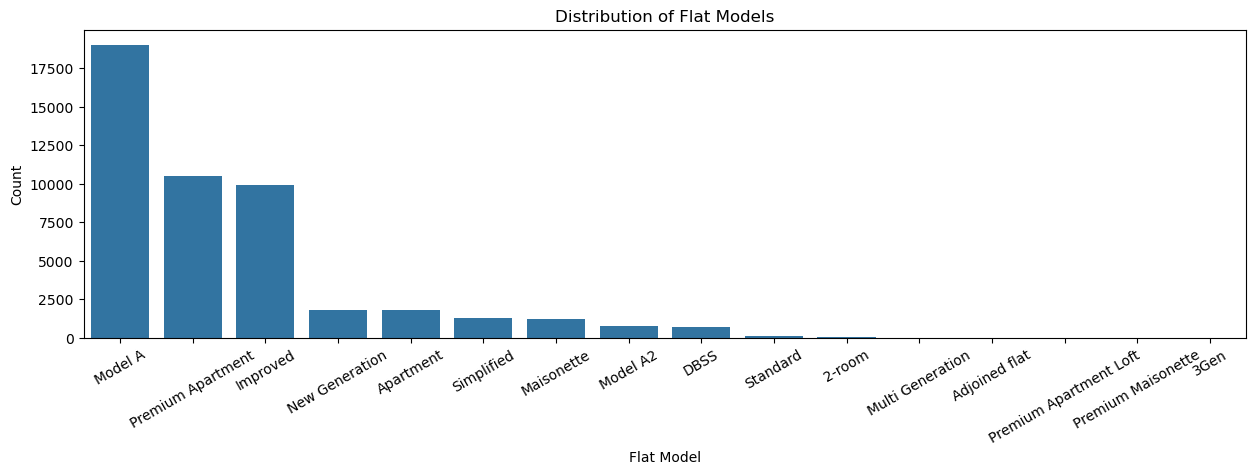

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(
    data=df,
    x='flat_model',
    order=df['flat_model'].value_counts().index
)
plt.title("Distribution of Flat Models")
plt.xlabel("Flat Model")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


Only a few flat models appear very frequently in the data, while many other flat models appear only a small number of times. This means the distribution is uneven, with most transactions concentrated in a small number of common flat models and many flat models having very low counts.

For modelling, this means the model will mainly learn from the common flat models, because they make up most of the data. Flat models with very few transactions may not be learned well by the model, so predictions for those flat models may be less accurate. 

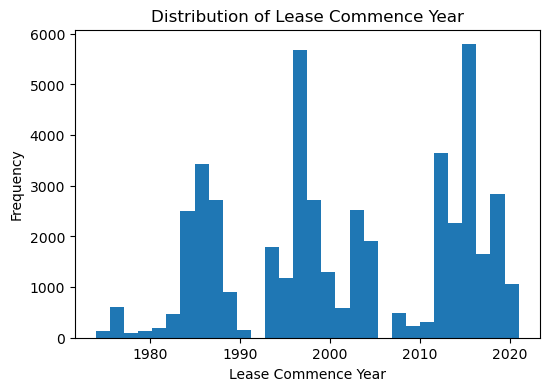

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df['lease_commence_date'], bins=30)
plt.title("Distribution of Lease Commence Year")
plt.xlabel("Lease Commence Year")
plt.ylabel("Frequency")
plt.show()


The lease commence year shows a non-uniform distribution, with transactions clustered around certain time periods rather than evenly spread across all years. Flats with more recent lease commence years are more prevalent in the dataset, while flats with much older lease commence years form a smaller proportion of the data.

From a modelling perspective, this imbalance means that the model will be biased toward learning patterns from more common lease commence years. Lease commence years with fewer observations may contribute less to model learning, which can lead to higher prediction uncertainty for older flats.

### 2.3.2 Understanding relationship between variables

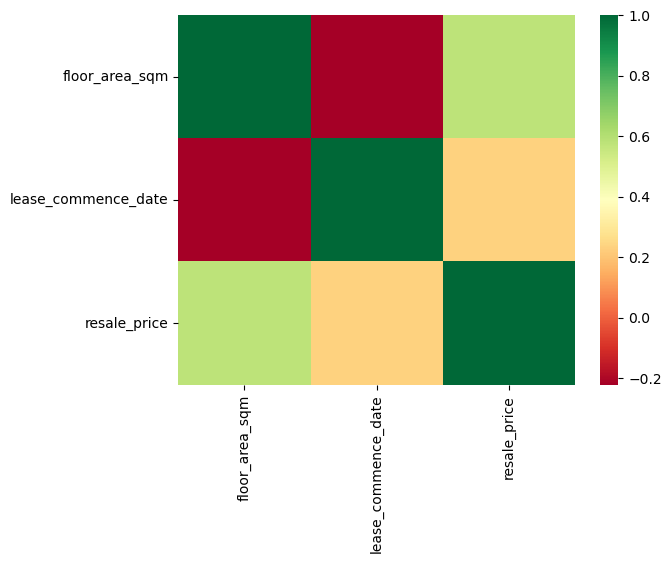

In [22]:
## Understanding relationship between variables
df_corr = df[['floor_area_sqm', 'lease_commence_date', 'resale_price']].corr()

## Plot heatmap
sns.heatmap(df_corr, cmap='RdYlGn')
plt.show()

The correlation analysis shows that floor area (sqm) has a high positive correlation with resale price (0.6 ≤ r ≤ 0.79), indicating a strong linear relationship where resale prices increase as floor area increases. Lease commence year exhibits a moderate positive correlation with resale price (0.4 ≤ r ≤ 0.59), suggesting that newer flats generally command higher resale prices, but with more variability compared to floor area. The correlation between floor area and lease commence year is low, indicating limited linear dependence between the two predictors.

For modelling, this indicates that floor area is a strong predictor of resale price, while lease commence year provides additional but less dominant predictive information. Since the predictors are not highly correlated with each other, including both features is unlikely to introduce multicollinearity and can improve the model’s ability to explain variations in resale price.

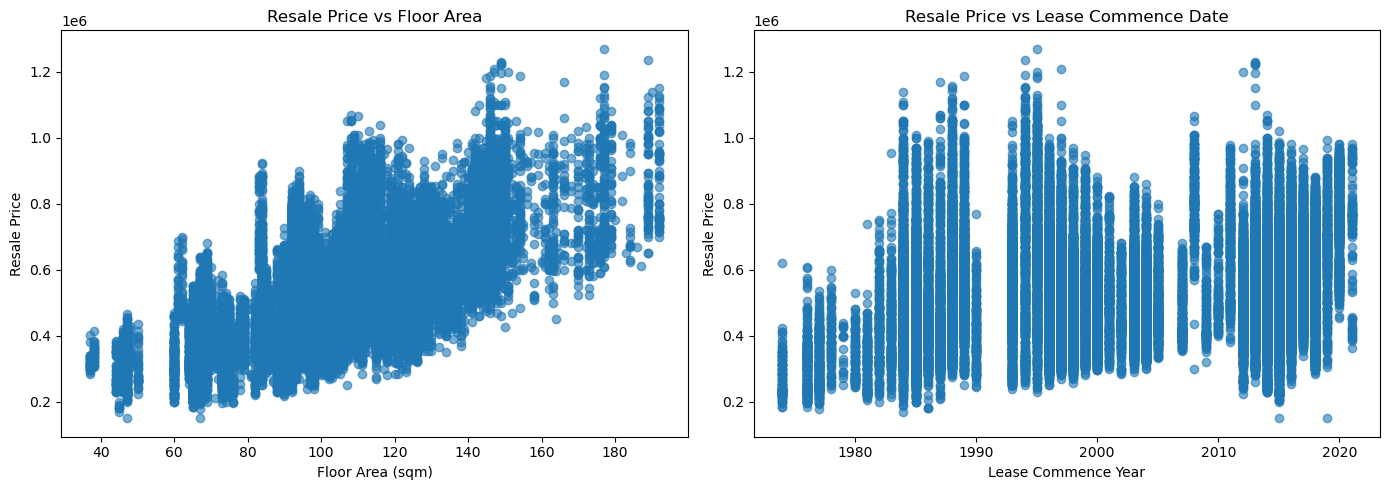

In [23]:
plt.figure(figsize=(14,5))

# 1. Floor area vs resale price
plt.subplot(1, 2, 1)
plt.scatter(df['floor_area_sqm'], df['resale_price'], alpha=0.6)
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Floor Area')

# 2. Lease commence date vs resale price
plt.subplot(1, 2, 2)
plt.scatter(df['lease_commence_date'], df['resale_price'], alpha=0.6)
plt.xlabel('Lease Commence Year')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Lease Commence Date')

plt.tight_layout()
plt.show()


Resale Price vs Floor Area

The scatter plot shows a clear positive relationship between floor area and resale price. As floor area increases, resale prices generally increase. The points follow an upward trend, although there is noticeable spread, especially at larger floor areas, indicating higher variability in prices for bigger flats.
For modelling, this confirms that floor area is a strong predictor of resale price. The increasing spread at higher floor areas suggests that predictions for larger flats may be more variable, but this does not reduce the importance of floor area as a key feature.

Resale Price vs Lease Commence Year 

The scatter plot shows a moderate positive relationship between lease commence year and resale price. Flats with more recent lease commence years generally have higher resale prices, while older flats tend to have lower resale prices. However, the data points are widely spread across most years, indicating substantial variability in resale prices for flats with the same lease commence year. 
 bFor modelling, this indicates that lease commence year is a useful but weaker predictor compared to floor area. It contributes additional information to the model but does not strongly determine resale price on its own, and is best used together with other features.

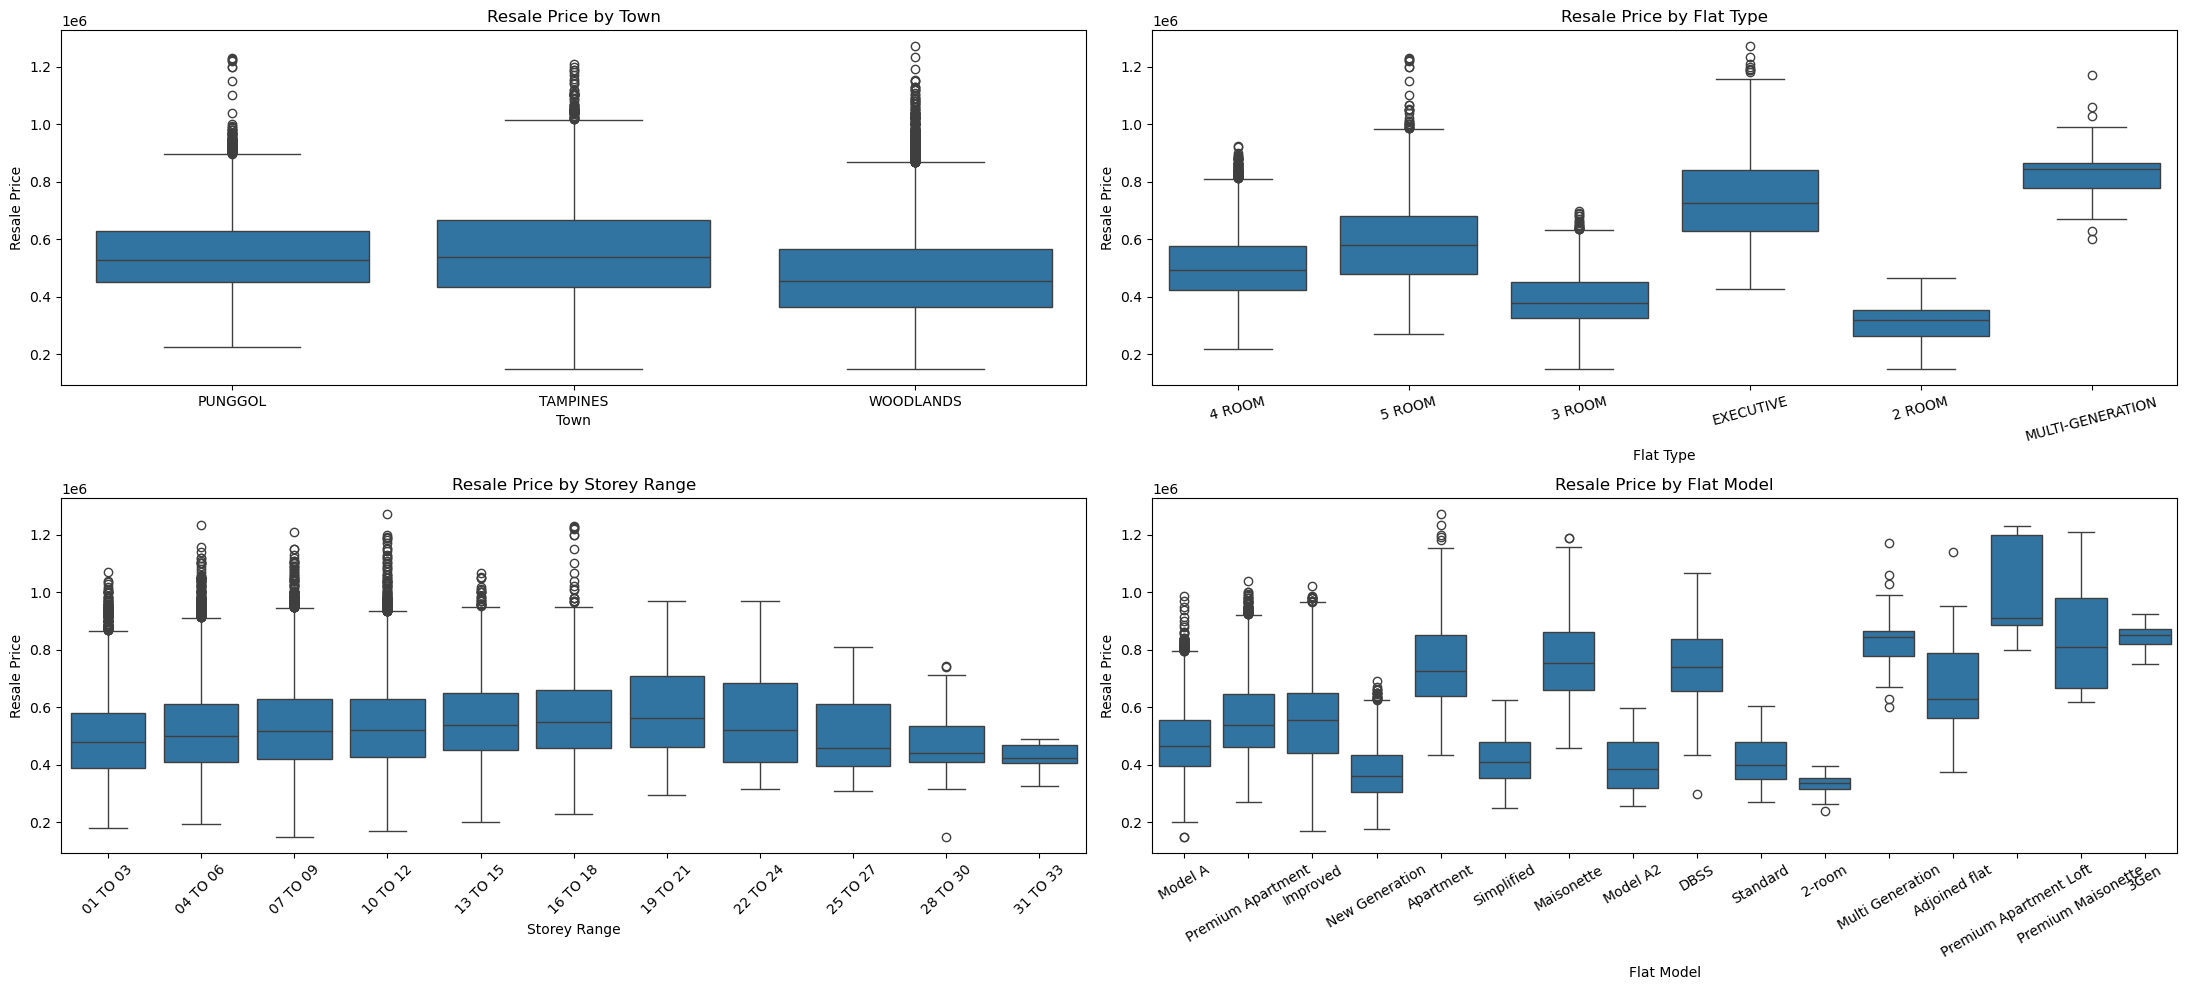

In [24]:
# Create ordered storey range
storey_order = sorted(
    df['storey_range'].unique(),
    key=lambda x: int(x.split(' ')[0])
)

# Create subplot grid
fig, axes = plt.subplots(2, 2, figsize=(22, 10))
axes = axes.flatten()

# 1. Town vs resale price
sns.boxplot(
    data=df,
    x='town',
    y='resale_price',
    ax=axes[0]
)
axes[0].set_title('Resale Price by Town')
axes[0].set_xlabel('Town')
axes[0].set_ylabel('Resale Price')

# 2. Flat type vs resale price
sns.boxplot(
    data=df,
    x='flat_type',
    y='resale_price',
    order=df['flat_type'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title('Resale Price by Flat Type')
axes[1].set_xlabel('Flat Type')
axes[1].set_ylabel('Resale Price')
axes[1].tick_params(axis='x', rotation=15)

# 3. Storey range vs resale price (ordered)
sns.boxplot(
    data=df,
    x='storey_range',
    y='resale_price',
    order=storey_order,
    ax=axes[2]
)
axes[2].set_title('Resale Price by Storey Range')
axes[2].set_xlabel('Storey Range')
axes[2].set_ylabel('Resale Price')
axes[2].tick_params(axis='x', rotation=45)

# 4. Flat model vs resale price
sns.boxplot(
    data=df,
    x='flat_model',
    y='resale_price',
    order=df['flat_model'].value_counts().index,
    ax=axes[3]
)
axes[3].set_title('Resale Price by Flat Model')
axes[3].set_xlabel('Flat Model')
axes[3].set_ylabel('Resale Price')
axes[3].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.show()


Resale Price by Town

The median resale prices across Punggol, Tampines, and Woodlands are relatively similar, with Tampines showing a slightly higher median. All three towns show a wide spread of resale prices and several high-value outliers.
For modelling, this indicates that town has an effect on resale price but does not dominate on its own. Town should be kept as a categorical feature, as it provides location-level variation without extreme imbalance.

Resale Price by Flat Type

Median resale prices increase clearly with flat type size, with 2-room flats having the lowest medians and Executive and Multi-Generation flats having the highest. Larger flat types also show greater price spread and more high-value outliers.
For modelling, this shows that flat type has a strong relationship with resale price and is an important categorical feature. Differences between flat types are clear and consistent, making this feature valuable for prediction.

Resale Price by Storey Range

Median resale prices generally increase from lower to mid storey ranges, then stabilise or slightly decrease at higher storey ranges. Higher storey ranges show fewer observations and less consistent price patterns.
For modelling, this suggests that storey range has an effect on resale price, but its influence is weaker and less consistent compared to flat type or floor area. The ordered nature of storey range supports treating it as an ordinal or numeric feature.

Resale Price by Flat Model

Different flat models show noticeably different median resale prices and price spreads. Some flat models consistently have higher medians, while others cluster at lower price ranges. Several flat models also have very wide spreads and outliers.
For modelling, this indicates that flat model captures additional variation in resale price, but uneven category frequencies may affect prediction

# 3. Data Preparation

## 3.1 Data Cleaning

In [25]:
## Clean data
# Drop street_name due to high cardinality and redundancy with town
df = df.drop(columns=['street_name','block'])

# Convert month column to datetime
df['month'] = pd.to_datetime(df['month'])

# Extract year and month as numeric features
df['transaction_year'] = df['month'].dt.year
df['transaction_month'] = df['month'].dt.month

# Drop original month column
df = df.drop(columns=['month'])


I dropped street_name and block because they have too many different values. From the previous EDA, street_name has 92 unique values and block has 1513 unique values. If I keep these columns, I would need to convert them into numbers for machine learning, and the usual method is one-hot encoding. However, one-hot encoding would create a very large number of extra columns (especially for block), which makes the dataset much wider, slows down training, and can cause the model to focus on very specific values instead of learning general patterns, hence increasing the risk of being overfitted. 

For the month column, it was originally stored as an object type, so I converted it to a proper datetime format first. I did not want to drop this column because my earlier EDA showed that time has a relationship with resale prices. Instead of one-hot encoding the full month values (which would again add many extra columns), I split it into transaction_year and transaction_month. This keeps the important information in a simpler numeric form. The year helps the model learn long-term price changes over time, and the month keeps the possibility of capturing seasonal patterns (if any) in resale prices. After extracting these two columns, I dropped the original month column to avoid repeating the same information twice.

## 3.2 Train-Test Split

Linear Regression was used as a baseline regression model to predict HDB resale prices. The model assumes a linear relationship between the input features and the target variable, where the resale price is expressed as a weighted sum of the input features plus a bias term. During training, the model learns the optimal coefficients by minimising the squared differences between predicted and actual resale prices.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Target
y = df['resale_price']

# Features + one-hot encoding
X = df.drop('resale_price', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025
)

# 4. Modelling

### 4.2 Train Model

In [27]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# 5. Model Evaluation

In [28]:
# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate once
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MAE:", mae_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R²:", r2_lr)


Linear Regression MAE: 39943.911276141625
Linear Regression MSE: 2657300307.1221642
Linear Regression RMSE: 51549.00878893952
Linear Regression R²: 0.8831088959323496


# Chosen Metric

RMSE was selected as the primary evaluation metric because it penalises large prediction errors more heavily than MAE, which is important in housing price estimation where large errors can lead to significant financial impact. While MAE provides an intuitive average error, it treats all errors equally and does not sufficiently reflect the risk of large deviations. MSE was not chosen as the main metric because its squared units reduce interpretability. RMSE also retains the same unit as the target variable, making the results easier to interpret while remaining sensitive to large errors.

# Other Models

A Decision Tree Regressor predicts resale price by repeatedly splitting the data based on feature values to minimise prediction error. At each split, the model selects the feature and threshold that best separates the data, and the final prediction is the average resale price of the samples in the leaf node.

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialise Decision Tree
dt = DecisionTreeRegressor(random_state=2025)

# Train
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree MAE:", mae_dt)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R²:", r2_dt)


Decision Tree MAE: 27465.696540376975
Decision Tree MSE: 1472039247.1121273
Decision Tree RMSE: 38367.16365737931
Decision Tree R²: 0.9352469525688657


A Random Forest Regressor predicts resale price by combining the predictions of many decision trees trained on different random subsets of the data and features. The final prediction is the average of all individual tree predictions, which reduces overfitting and improves generalisation.

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialise Random Forest (default settings)
rf = RandomForestRegressor(
    random_state=2025
)

# Train model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R²:", r2_rf)



Random Forest MAE: 21837.716468254122
Random Forest MSE: 914663636.7019626
Random Forest RMSE: 30243.40649963166
Random Forest R²: 0.959765163892818


Gradient Boosting Regressor predicts resale price by building decision trees sequentially, where each new tree is trained to correct the errors made by the previous trees. The final prediction is the sum of the contributions from all trees, allowing the model to gradually improve accuracy.

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialise Gradient Boosting
gbr = GradientBoostingRegressor(random_state=2025)

# Train
gbr.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr.predict(X_test)

# Evaluate
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting MSE:", mse_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)
print("Gradient Boosting R²:", r2_gbr)


Gradient Boosting MAE: 26855.240519610918
Gradient Boosting MSE: 1291998617.267188
Gradient Boosting RMSE: 35944.38227688978
Gradient Boosting R²: 0.9431667002703973


In [32]:
comparison_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting"
    ],
    "MAE": [
        mae_lr,
        mae_dt,
        mae_rf,
        mae_gbr
    ],
        "MSE": [
        mse_lr,
        mse_dt,
        mse_rf,
        mse_gbr
    ],
    "RMSE": [
        rmse_lr,
        rmse_dt,
        rmse_rf,
        rmse_gbr
    ],
    "R²": [
        r2_lr,
        r2_dt,
        r2_rf,
        r2_gbr
    ]
})

comparison_df


,Model,MAE,MSE,RMSE,R²
0,Linear Regression,39943.911276,2.657300e+09,51549.008789,0.883109
1,Decision Tree,27465.696540,1.472039e+09,38367.163657,0.935247
2,Random Forest,21837.716468,9.146636e+08,30243.406500,0.959765
3,Gradient Boosting,26855.240520,1.291999e+09,35944.382277,0.943167


Random Forest was selected as the final model because it achieved the lowest RMSE (30,346.87) among all evaluated models, indicating the smallest average prediction error for HDB resale price prediction. In comparison, Linear Regression produced an RMSE of 51,443.41, Decision Tree achieved 38,915.97, and Gradient Boosting achieved 35,774.38. This demonstrates that Random Forest predicts resale prices more accurately than the other models.

In the context of HDB resale prices, reducing prediction error is crucial because even small percentage errors can translate into large absolute price differences. By achieving the lowest RMSE, Random Forest minimises large deviations between predicted and actual resale prices, making it the most reliable model for practical price estimation.

There since Random Forest provides the most accurate and dependable performance for HDB resale price prediction and was therefore selected as the final model.

## Iterative model development


In [33]:
df_rf_feat_impt = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

df_rf_feat_impt["Cumulative importance"] = df_rf_feat_impt["Importance"].cumsum()
df_rf_feat_impt.head(20)


,Feature,Importance,Cumulative importance
0,floor_area_sqm,0.451022,0.451022
2,transaction_year,0.301010,0.752032
1,lease_commence_date,0.075998,0.828030
5,town_WOODLANDS,0.073594,0.901624
24,flat_model_DBSS,0.039319,0.940943
3,transaction_month,0.016081,0.957024
4,town_TAMPINES,0.008956,0.965979
7,flat_type_4 ROOM,0.005877,0.971856
13,storey_range_10 TO 12,0.003679,0.975535
27,flat_model_Model A,0.003123,0.978658


C:\Users\Hamsi\AppData\Local\Temp\ipykernel_21756\1219978695.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_rf_feat_impt["Feature"], rotation=45, ha="right")


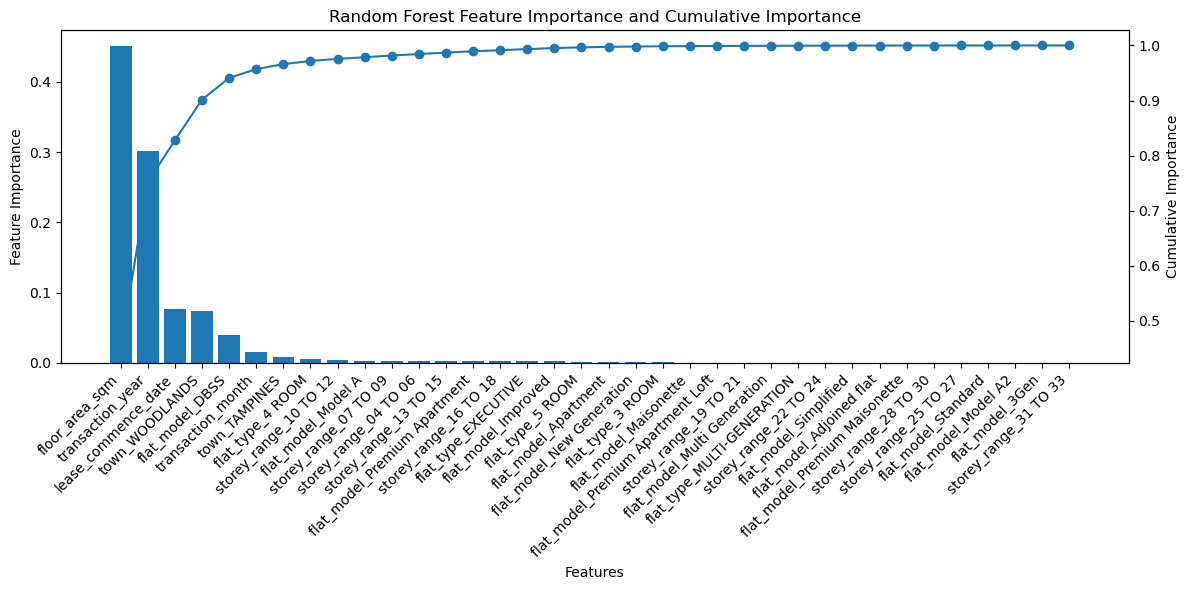

In [34]:
# Plot feature importance and cumulative importance
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for feature importance
ax1.bar(
    df_rf_feat_impt["Feature"],
    df_rf_feat_impt["Importance"]
)
ax1.set_xlabel("Features")
ax1.set_ylabel("Feature Importance")
ax1.tick_params(axis="y")
ax1.set_xticklabels(df_rf_feat_impt["Feature"], rotation=45, ha="right")

# Line chart for cumulative importance
ax2 = ax1.twinx()
ax2.plot(
    df_rf_feat_impt["Feature"],
    df_rf_feat_impt["Cumulative importance"],
    marker="o"
)
ax2.set_ylabel("Cumulative Importance")
ax2.tick_params(axis="y")

plt.title("Random Forest Feature Importance and Cumulative Importance")
plt.tight_layout()
plt.show()


The feature importance results from the Random Forest model indicate that resale price prediction is driven primarily by a small number of highly influential features, while the majority of remaining features contribute only marginally. The distribution of importance values is strongly skewed, showing that the model concentrates most of its predictive power on a few key variables rather than relying evenly on all available features.

Among all predictors, floor area (floor_area_sqm) emerges as the most influential feature by a significant margin. This suggests that the physical size of a flat is the dominant factor in determining resale price, which is consistent with real-world housing market behaviour, as larger units generally command higher prices regardless of location or flat configuration.

Time-related variables, including transaction year and lease commence date, are also among the top contributors. Their high importance indicates that resale prices are strongly affected by market conditions over time and the remaining lease value of the flat. Flats transacted in more recent years or with longer remaining leases tend to have higher resale values, reflecting both market appreciation and lease depreciation effects.

Location-based features, represented by town-level variables, show moderate importance relative to size and time factors. While town does influence pricing, its impact is secondary compared to physical attributes and temporal factors. This suggests that although location differentiates resale values across towns, it does not override the effects of flat size and lease-related characteristics.

Most flat type, flat model, and storey range categories exhibit very low individual importance. As these features are one-hot encoded, their influence is distributed across multiple binary variables, resulting in low individual importance scores. Collectively, however, they still contribute contextual information that helps the model refine predictions.

The cumulative importance curve shows that approximately 90% of total feature importance is captured by the top 6 to 8 features, after which additional features contribute minimally. This indicates diminishing returns from including more granular categorical variables and suggests that the model effectively prioritises the most informative predictors. Overall, the feature importance results demonstrate that the Random Forest model learns economically meaningful relationships and relies on core housing attributes rather than noise, supporting its reliability for resale price prediction.

# Feature Engineering

Transform Story Range into Storey Midpoint

The original storey_range feature is a categorical variable that represents a range of floor levels (e.g., “10 TO 12”). While this format is human-readable, it does not directly convey an ordinal or numerical relationship to the model. Treating storey_range as a categorical feature through one-hot encoding results in many sparse binary variables, which prevents the model from fully capturing the monotonic relationship between storey height and resale price.

To address this limitation, the storey range was transformed into a numeric midpoint value (storey_mid), calculated as the average of the lower and upper bounds of the range. This conversion allows the model to interpret storey height as a continuous variable, enabling it to learn gradual price differences associated with increasing floor levels rather than treating each range as an unrelated category.

This transformation was motivated by domain knowledge of the housing market, where higher floors generally command higher resale prices due to factors such as improved views, better ventilation, and reduced street-level noise. By representing storey height numerically, the model can more effectively capture these incremental effects, which are difficult to learn when storey ranges are encoded as independent categories.

In addition, converting storey_range into a single numeric feature reduces feature dimensionality and model complexity. One-hot encoding the original categorical storey ranges introduces many low-importance features, increasing sparsity without adding substantial predictive value. The midpoint transformation consolidates this information into a single, more informative variable, which improves interpretability and reduces noise.

After applying this transformation, the Random Forest model was retrained and evaluated. The updated performance metrics were compared against the baseline Random Forest model to assess whether the feature engineering step contributed to improved predictive performance. This comparison ensures that the transformation is not applied arbitrarily, but is empirically justified based on its impact on model accuracy and generalisation.

Overall, transforming storey range into a numeric midpoint was a deliberate feature engineering decision aimed at improving the model’s ability to learn meaningful price patterns, reducing unnecessary feature sparsity, and aligning the input representation with real-world housing price behaviour.

In [35]:
# Function to extract midpoint from storey_range
def get_storey_midpoint(storey_range):
    low, high = storey_range.split(" TO ")
    return (int(low) + int(high)) / 2

# Apply conversion
df["storey_mid"] = df["storey_range"].apply(get_storey_midpoint)

# Drop original categorical column
df = df.drop(columns=["storey_range"])


In [36]:
# 1) Separate X and y
X = df.drop(columns=["resale_price"])
y = df["resale_price"]

# 2) Convert all text columns to dummy columns
X = pd.get_dummies(X, drop_first=True)

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025
)

# 4) Train model
rf_storey = RandomForestRegressor(
    random_state=2025,
    n_jobs=-1
)
rf_storey.fit(X_train, y_train)

df_rf_feat_impt_storey = pd.DataFrame({
    "Feature": X_train.columns,                 # the actual columns used in training
    "Importance": rf_storey.feature_importances_
}).sort_values(by="Importance", ascending=False)

df_rf_feat_impt_storey["Cumulative importance"] = df_rf_feat_impt_storey["Importance"].cumsum()

df_rf_feat_impt_storey.head(20)


# 5) Predict
y_pred_storey = rf_storey.predict(X_test)

# 6) Evaluate
mae_storey = mean_absolute_error(y_test, y_pred_storey)
mse_storey = mean_squared_error(y_test, y_pred_storey)
rmse_storey = np.sqrt(mse_storey)
r2_storey = r2_score(y_test, y_pred_storey)

print("RF (After Storey Mid) MAE:", mae_storey)
print("RF (After Storey Mid) MSE:", mse_storey)
print("RF (After Storey Mid) RMSE:", rmse_storey)
print("RF (After Storey Mid) R²:", r2_storey)


RF (After Storey Mid) MAE: 20961.33303161139
RF (After Storey Mid) MSE: 847840892.5841517
RF (After Storey Mid) RMSE: 29117.707543420238
RF (After Storey Mid) R²: 0.9627046074761517


In [37]:
# uses your existing previous RF metrics: mae_rf, mse_rf, rmse_rf, r2_rf
rf_vs_storey_df = pd.DataFrame({
    "Model": [
        "Random Forest (Before Storey Midpoint)",
        "Random Forest (After Storey Midpoint)"
    ],
    "MAE": [mae_rf, mae_storey],
    "MSE": [mse_rf, mse_storey],
    "RMSE": [rmse_rf, rmse_storey],
    "R²":  [r2_rf,  r2_storey]
})

rf_vs_storey_df


,Model,MAE,MSE,RMSE,R²
0,Random Forest (Before Storey Midpoint),21837.716468,9.146636e+08,30243.406500,0.959765
1,Random Forest (After Storey Midpoint),20961.333032,8.478409e+08,29117.707543,0.962705


# Flat Age Feature Creation

In [38]:
# # Flat Age Feature Creation
# # flat_age = transaction_year - lease_commence_date
# df["flat_age"] = df["transaction_year"] - df["lease_commence_date"]

# # (Optional) Drop lease_commence_date after creating flat_age
# df = df.drop(columns=["lease_commence_date"], errors="ignore")


In [39]:
# # 1) Separate X and y
# X = df.drop(columns=["resale_price"])
# y = df["resale_price"]

# # 2) One-hot encode any remaining text columns
# X = pd.get_dummies(X, drop_first=True)

# # 3) Train-test split 
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=2025
# )

# # 4) Train RF
# rf_flat = RandomForestRegressor(
#     random_state=2025,
#     n_jobs=-1
# )
# rf_flat.fit(X_train, y_train)

# # 5) Predict
# y_pred_flat = rf_flat.predict(X_test)

# # 6) Metrics
# mae_flat = mean_absolute_error(y_test, y_pred_flat)
# mse_flat = mean_squared_error(y_test, y_pred_flat)
# rmse_flat = np.sqrt(mse_flat)
# r2_flat = r2_score(y_test, y_pred_flat)

# print("RF (After Flat Age) MAE:", mae_flat)
# print("RF (After Flat Age) MSE:", mse_flat)
# print("RF (After Flat Age) RMSE:", rmse_flat)
# print("RF (After Flat Age) R²:", r2_flat)


In [40]:
# storey_vs_flat_df = pd.DataFrame({
#     "Model": [
#         "Random Forest (After Storey Midpoint)",
#         "Random Forest (After Flat Age)"
#     ],
#     "MAE": [mae_storey, mae_flat],
#     "MSE": [mse_storey, mse_flat],
#     "RMSE": [rmse_storey, rmse_flat],
#     "R²":  [r2_storey,  r2_flat]
# })

# storey_vs_flat_df


In [41]:
# # Create feature (log it in df)
# CURRENT_YEAR = df["transaction_year"].max()
# df["years_since_transaction"] = CURRENT_YEAR - df["transaction_year"]


In [42]:
# # 1) Separate X and y
# X = df.drop(columns=["resale_price"])
# y = df["resale_price"]

# # 2) One-hot encode categorical columns
# X = pd.get_dummies(X, drop_first=True)

# # 3) Train-test split (keep same seed for fair comparison)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=2025
# )

# # 4) Train model
# rf_years_since = RandomForestRegressor(
#     random_state=2025,
#     n_jobs=-1
# )
# rf_years_since.fit(X_train, y_train)

# # 5) Predict
# y_pred_years_since = rf_years_since.predict(X_test)

# # 6) Metrics
# mae_years_since = mean_absolute_error(y_test, y_pred_years_since)
# mse_years_since = mean_squared_error(y_test, y_pred_years_since)
# rmse_years_since = np.sqrt(mse_years_since)
# r2_years_since = r2_score(y_test, y_pred_years_since)

# print("RF (After Years Since Transaction) MAE:", mae_years_since)
# print("RF (After Years Since Transaction) MSE:", mse_years_since)
# print("RF (After Years Since Transaction) RMSE:", rmse_years_since)
# print("RF (After Years Since Transaction) R²:", r2_years_since)


In [43]:
# comparison_years_since = pd.DataFrame({
#     "Model": [
#         "Random Forest (After Storey Midpoint)",
#         "Random Forest (After Years Since Transaction)"
#     ],
#     "MAE": [mae_storey, mae_years_since],
#     "MSE": [mse_storey, mse_years_since],
#     "RMSE": [rmse_storey, rmse_years_since],
#     "R²":  [r2_storey,  r2_years_since]
# })

# comparison_years_since


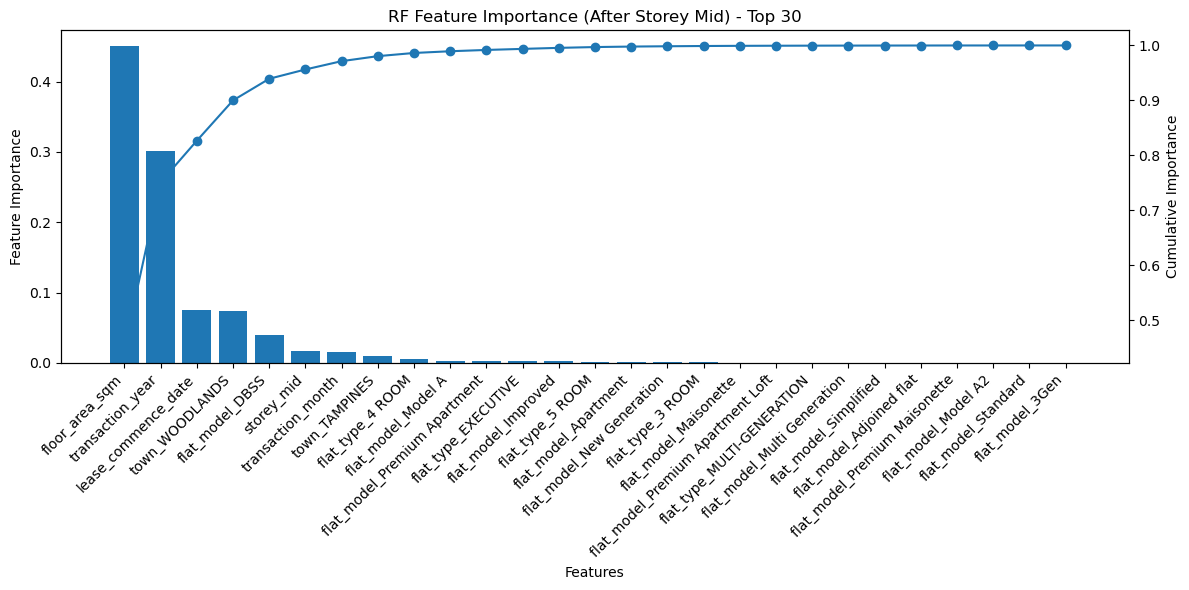

In [44]:
top_n = 30
plot_df = df_rf_feat_impt_storey.head(top_n)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(plot_df["Feature"], plot_df["Importance"])
ax1.set_xlabel("Features")
ax1.set_ylabel("Feature Importance")
ax1.set_xticks(range(len(plot_df)))
ax1.set_xticklabels(plot_df["Feature"], rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.plot(range(len(plot_df)), plot_df["Cumulative importance"], marker="o")
ax2.set_ylabel("Cumulative Importance")

plt.title(f"RF Feature Importance (After Storey Mid) - Top {top_n}")
plt.tight_layout()
plt.show()


In [45]:
df = df.drop(columns=["flat_type"])


In [46]:
X = df.drop(columns=["resale_price"])
y = df["resale_price"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025
)

rf = RandomForestRegressor(
    random_state=2025,
    n_jobs=-1
)
rf.fit(X_train, y_train)

df_rf_feat_impt = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

df_rf_feat_impt["Cumulative importance"] = df_rf_feat_impt["Importance"].cumsum()

df_rf_feat_impt.head(20)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RF (Storey Mid, NO Flat Type) MAE:", mae)
print("RF (Storey Mid, NO Flat Type) MSE:", mse)
print("RF (Storey Mid, NO Flat Type) RMSE:", rmse)
print("RF (Storey Mid, NO Flat Type) R²:", r2)


RF (Storey Mid, NO Flat Type) MAE: 20970.266864714646
RF (Storey Mid, NO Flat Type) MSE: 842749171.8796103
RF (Storey Mid, NO Flat Type) RMSE: 29030.142470880335
RF (Storey Mid, NO Flat Type) R²: 0.9629285854936768


In [47]:
rf_flattype_compare_df = pd.DataFrame({
    "Model": [
        "RF (Storey Mid, WITH Flat Type)",
        "RF (Storey Mid, NO Flat Type)"
    ],
    "MAE":  [mae_storey, mae],
    "MSE":  [mse_storey, mse],
    "RMSE": [rmse_storey, rmse],
    "R²":   [r2_storey, r2]
})

rf_flattype_compare_df


,Model,MAE,MSE,RMSE,R²
0,"RF (Storey Mid, WITH Flat Type)",20961.333032,8.478409e+08,29117.707543,0.962705
1,"RF (Storey Mid, NO Flat Type)",20970.266865,8.427492e+08,29030.142471,0.962929


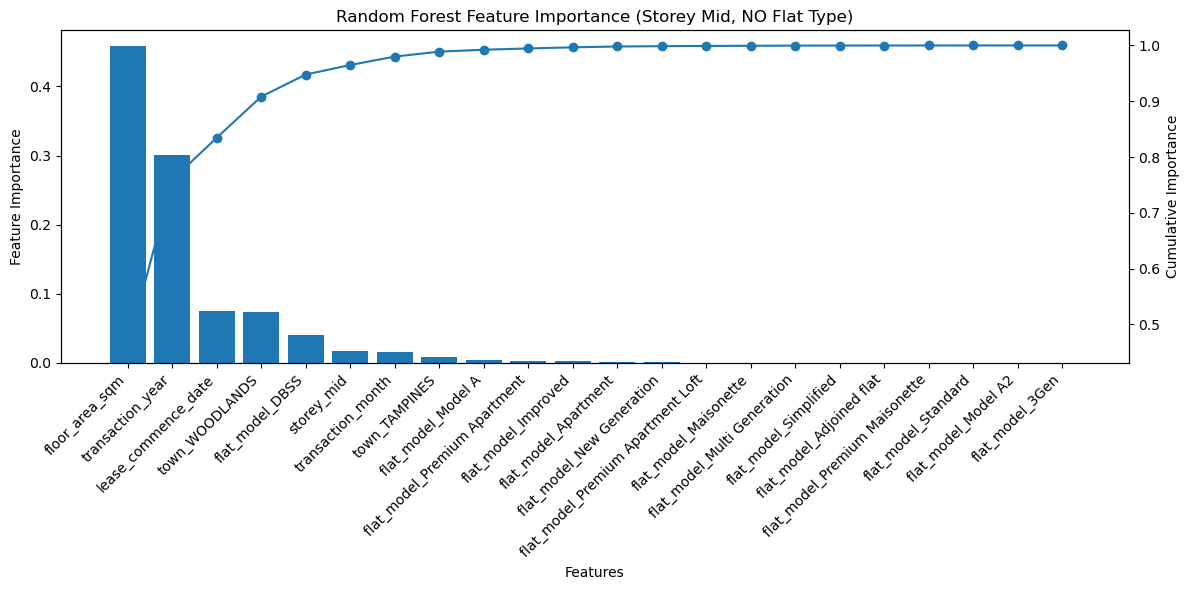

In [48]:
top_n = 30
plot_df = df_rf_feat_impt.head(top_n)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(plot_df["Feature"], plot_df["Importance"])
ax1.set_xlabel("Features")
ax1.set_ylabel("Feature Importance")
ax1.set_xticks(range(len(plot_df)))
ax1.set_xticklabels(plot_df["Feature"], rotation=45, ha="right")

ax2 = ax1.twinx()
ax2.plot(range(len(plot_df)), plot_df["Cumulative importance"], marker="o")
ax2.set_ylabel("Cumulative Importance")

plt.title("Random Forest Feature Importance (Storey Mid, NO Flat Type)")
plt.tight_layout()
plt.show()


In [49]:
df

,town,floor_area_sqm,flat_model,lease_commence_date,resale_price,transaction_year,transaction_month,storey_mid
708,PUNGGOL,85.0,Model A,2004,350000.0,2017,1,11.0
709,PUNGGOL,91.0,Premium Apartment,2003,370000.0,2017,1,8.0
710,PUNGGOL,91.0,Model A,2003,370000.0,2017,1,8.0
711,PUNGGOL,90.0,Model A,2003,380000.0,2017,1,14.0
712,PUNGGOL,92.0,Model A,2012,408000.0,2017,1,2.0
...,...,...,...,...,...,...,...,...
223131,WOODLANDS,127.0,Improved,1996,655000.0,2026,1,2.0
223132,WOODLANDS,130.0,Apartment,2000,820000.0,2026,1,2.0
223133,WOODLANDS,144.0,Maisonette,1998,885000.0,2026,1,5.0
223134,WOODLANDS,143.0,Apartment,1998,820000.0,2026,1,2.0


# Tuning of ForestRegresser

In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import joblib

rf = RandomForestRegressor(random_state=2025, n_jobs=-1)

param_dist_rf = {
    "n_estimators": [50, 100, 150],
    "max_depth": [10, 15, 20],
    "min_samples_leaf": [3, 5, 10],
    "max_features": ["sqrt", "log2"]
}

rs_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=3,
    scoring="neg_root_mean_squared_error",
    random_state=2025,
    n_jobs=-1,
    verbose=2
)

rs_rf.fit(X_train, y_train)

best_rs_rf = rs_rf.best_estimator_
print("Best Params:", rs_rf.best_params_)
print("Best CV RMSE:", -rs_rf.best_score_)

pred_tuned = best_rs_rf.predict(X_test)

mae_tuned = mean_absolute_error(y_test, pred_tuned)
mse_tuned = mean_squared_error(y_test, pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, pred_tuned)

print("Tuned RF Test MAE:", mae_tuned)
print("Tuned RF Test MSE:", mse_tuned)
print("Tuned RF Test RMSE:", rmse_tuned)
print("Tuned RF Test R²:", r2_tuned)

# Optional: show top 5 parameter sets tried
cv_results = pd.DataFrame(rs_rf.cv_results_)
cv_results["mean_rmse"] = -cv_results["mean_test_score"]
top5 = cv_results.sort_values("mean_rmse").head(5)[
    ["mean_rmse", "param_n_estimators", "param_max_depth", "param_min_samples_leaf", "param_max_features"]
]
print(top5)

# Save tuned model + feature columns for Streamlit
joblib.dump(best_rs_rf, "model.pkl", compress=3)
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 20}
Best CV RMSE: 32508.93554839391
Tuned RF Test MAE: 22760.59200175747
Tuned RF Test MSE: 945469442.589631
Tuned RF Test RMSE: 30748.486834145693
Tuned RF Test R²: 0.9584100574894311
      mean_rmse  param_n_estimators  param_max_depth  param_min_samples_leaf  \
5  32508.935548                 100               20                       3   
8  32614.602711                 150               20                       3   
9  34246.808207                 150               15                       3   
7  34336.004444                 100               15                       3   
1  35606.548580                 150               20                       5   

  param_max_features  
5               log2  
8               log2  
9               log2  
7               log2  
1               sqrt  


['feature_columns.pkl']

In [52]:
pred_tuned = best_rs_rf.predict(X_test)

mae_tuned = mean_absolute_error(y_test, pred_tuned)
mse_tuned = mean_squared_error(y_test, pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, pred_tuned))
r2_tuned = r2_score(y_test, pred_tuned)

print("Tuned RF Test MAE:", mae_tuned)
print("Tuned RF Test MSE:", mse_tuned) 
print("Tuned RF Test RMSE:", rmse_tuned)
print("Tuned RF Test R²:", r2_tuned)


Tuned RF Test MAE: 22760.592001757475
Tuned RF Test MSE: 945469442.5896307
Tuned RF Test RMSE: 30748.48683414569
Tuned RF Test R²: 0.9584100574894311


In [53]:
rf_tuning_compare_df = pd.DataFrame({
    "Model": [
        "RF Baseline (Storey Mid, NO Flat Type)",
        "RF Tuned (RandomizedSearchCV)"
    ],
    "MAE":  [mae, mae_tuned],
    "MSE":  [mse, mse_tuned],
    "RMSE": [rmse, rmse_tuned],
    "R²":   [r2,  r2_tuned]
})

rf_tuning_compare_df


,Model,MAE,MSE,RMSE,R²
0,"RF Baseline (Storey Mid, NO Flat Type)",20970.266865,8.427492e+08,29030.142471,0.962929
1,RF Tuned (RandomizedSearchCV),22760.592002,9.454694e+08,30748.486834,0.958410


In [54]:
print(rs_rf.best_params_)
print("CV RMSE:", -rs_rf.best_score_)
print("Test RMSE:", rmse_tuned)


{'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 20}
CV RMSE: 32508.93554839391
Test RMSE: 30748.48683414569


In [55]:
cv_results = pd.DataFrame(rs_rf.cv_results_)

# convert to positive RMSE
cv_results["mean_rmse"] = -cv_results["mean_test_score"]
cv_results["std_rmse"] = cv_results["std_test_score"]

top5 = cv_results.sort_values("mean_rmse").head(5)[
    ["mean_rmse", "std_rmse", "param_n_estimators", "param_max_depth", "rank_test_score"]
]

print(top5)


      mean_rmse     std_rmse  param_n_estimators  param_max_depth  \
5  32508.935548   755.713668                 100               20   
8  32614.602711   805.678223                 150               20   
9  34246.808207   517.225480                 150               15   
7  34336.004444   450.584749                 100               15   
1  35606.548580  1026.037799                 150               20   

   rank_test_score  
5                1  
8                2  
9                3  
7                4  
1                5  


In [56]:
print("CV RMSE:", -rs_rf.best_score_)
cv_results = pd.DataFrame(rs_rf.cv_results_)

joblib.dump(best_rs_rf, "model.pkl", compress=3)
joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")


CV RMSE: 32508.93554839391


['feature_columns.pkl']